In [20]:
import rdflib

g = rdflib.Graph()

VPMREFERENCE = rdflib.Namespace("http://www.3ds.com/RDF/ontology/archetype/vpmReference#")
PHYSICALPRODUCT = rdflib.Namespace("http://www.3ds.com/RDF/ontology/universe/physicalProduct#")
PRODUCT = rdflib.Namespace("http://www.3ds.com/RDF/ontology/universe/product#")
ARCHETYPE = rdflib.Namespace("http://www.3ds.com/RDF/ontology/archetype#")
RDFS = rdflib.RDFS
RDF = rdflib.RDF
XSD = rdflib.Namespace("http://www.w3.org/2001/XMLSchema#")
OWL = rdflib.OWL
PROV = rdflib.Namespace("http://www.w3.org/ns/prov#")
DS6W = rdflib.Namespace("http://www.w3.org/ds6w#")
PNO = rdflib.Namespace("http://www.3ds.com/RDF/ontology/archetype/person#")
SWYM = rdflib.Namespace("http://www.3ds.com/RDF/ontology/archetype/swym#")

g.bind("vpmReference", VPMREFERENCE)
g.bind("physicalProduct", PHYSICALPRODUCT)
g.bind("product", PRODUCT)
g.bind("archetype", ARCHETYPE)
g.bind("rdfs", RDFS)
g.bind("rdf", RDF)
g.bind("xsd", XSD)
g.bind("owl", OWL)
g.bind("prov", PROV)
g.bind("ds6w", DS6W)
g.bind("pno", PNO)
g.bind("swym", SWYM)

g.add((VPMREFERENCE.VPMReference, RDF.type, OWL.Class))
g.add((VPMREFERENCE.VPMReference, RDFS.subClassOf, ARCHETYPE.Archetype))
g.add((VPMREFERENCE.VPMReference, RDFS.comment, rdflib.Literal("Physical Product archetype", lang="en")))

g.add((PNO.Person, RDF.type, OWL.Class))
g.add((PNO.Person, RDFS.label, rdflib.Literal("Person", lang="en")))
g.add((PNO.Person, RDFS.comment, rdflib.Literal("Represents an individual person.", lang="en")))

person123 = PNO.person123
person124 = PNO.person124
g.add((person123, RDF.type, PNO.Person))
g.add((person123, PNO.name, rdflib.Literal("Alice")))
g.add((person123, DS6W.businessRole, rdflib.Literal("VP")))

g.add((person124, RDF.type, PNO.Person))
g.add((person124, PNO.name, rdflib.Literal("Bob")))
g.add((person124, DS6W.businessRole, rdflib.Literal("Data Scientist")))

print(g.serialize(format="turtle"))



@prefix archetype: <http://www.3ds.com/RDF/ontology/archetype#> .
@prefix ds6w: <http://www.w3.org/ds6w#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix pno: <http://www.3ds.com/RDF/ontology/archetype/person#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix vpmReference: <http://www.3ds.com/RDF/ontology/archetype/vpmReference#> .

pno:person123 a pno:Person ;
    pno:name "Alice" ;
    ds6w:businessRole "VP" .

pno:person124 a pno:Person ;
    pno:name "Bob" ;
    ds6w:businessRole "Data Scientist" .

vpmReference:VPMReference a owl:Class ;
    rdfs:comment "Physical Product archetype"@en ;
    rdfs:subClassOf archetype:Archetype .

pno:Person a owl:Class ;
    rdfs:label "Person"@en ;
    rdfs:comment "Represents an individual person."@en .




In [21]:
with open("rdf_data.ttl", "w") as f:
    f.write(g.serialize(format="turtle"))

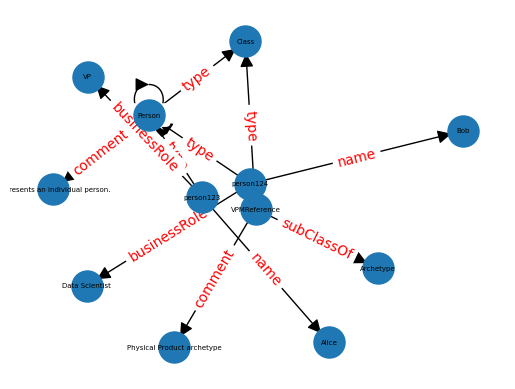

In [22]:
def rdf_to_networkx_graph(rdf_graph):
    nx_graph = nx.DiGraph()
    for s, p, o in rdf_graph:
        subject_label = s.split('#')[-1]
        predicate_label = p.split('#')[-1]
        object_label = o.split('#')[-1] if isinstance(o, rdflib.URIRef) else str(o)
        nx_graph.add_edge(subject_label, object_label, label=predicate_label)
    return nx_graph

nx_graph = rdf_to_networkx_graph(g)

pos = nx.spring_layout(nx_graph) 
nx.draw_networkx_nodes(nx_graph, pos, node_size=500)
nx.draw_networkx_edges(nx_graph, pos, edgelist=nx_graph.edges(), arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(nx_graph, pos, font_size=5, font_family='sans-serif')

edge_labels = nx.get_edge_attributes(nx_graph, 'label')
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_color='red')

plt.axis('off') 
plt.show() 